In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [24]:
plt.style.use('seaborn')

In [25]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')
print(dfx)
print(dfy)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1                       0.237   58  


In [26]:
# let's generate numpy arrays 
X = dfx.values
Y = dfy.values
# print(X)
# this is the serial number which we don't want , so we drop the first column and similarly for y also 
X = X[:,0:]
Y = Y[:,0].reshape((-1,))

print(X,Y)

print(X.shape)
print(Y.shape)

#print(Y)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]] [1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0

In [27]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=10):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

In [28]:
predicted=[]
dfq=pd.read_csv('Diabetes_Xtest.csv')
query=dfq.values
query = query[:,0:]
n=query.shape[0]
for j in range(n):
    q = int(knn(X,Y,query[j]))
    predicted.append(q)

(array([0., 1.]), array([4, 6], dtype=int64))
(array([0., 1.]), array([7, 3], dtype=int64))
(array([0., 1.]), array([8, 2], dtype=int64))
(array([0., 1.]), array([9, 1], dtype=int64))
(array([0.]), array([10], dtype=int64))
(array([0., 1.]), array([4, 6], dtype=int64))
(array([0., 1.]), array([4, 6], dtype=int64))
(array([0., 1.]), array([5, 5], dtype=int64))
(array([0.]), array([10], dtype=int64))
(array([0., 1.]), array([6, 4], dtype=int64))
(array([1.]), array([10], dtype=int64))
(array([0., 1.]), array([9, 1], dtype=int64))
(array([0., 1.]), array([3, 7], dtype=int64))
(array([0.]), array([10], dtype=int64))
(array([0., 1.]), array([6, 4], dtype=int64))
(array([0., 1.]), array([9, 1], dtype=int64))
(array([0., 1.]), array([8, 2], dtype=int64))
(array([0., 1.]), array([1, 9], dtype=int64))
(array([0., 1.]), array([3, 7], dtype=int64))
(array([0., 1.]), array([3, 7], dtype=int64))
(array([0., 1.]), array([4, 6], dtype=int64))
(array([0., 1.]), array([7, 3], dtype=int64))
(array([0., 

In [29]:
predicted=np.array(predicted)
print(predicted)

[1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 0]


In [18]:
df=pd.DataFrame({'Outcome': predicted})

In [19]:
df.to_csv('Diabetes_YTest_pred.csv',index=False)

In [20]:
frames=[dfx,dfy]
dfz=pd.concat(frames,axis=1)
print(dfz)
Z=dfz.values
print(Z)
class1=dfz[(dfz['Outcome']==1)]
class0=dfz[(dfz['Outcome']==0)]
print(class0)
print(class1)
c0_1=np.array(class0['Pregnancies'].values)
c0_2=np.array(class0['Glucose'].values)
c0_3=np.array(class0['BloodPressure'].values)
c0_4=np.array(class0['SkinThickness'].values)
c0_5=np.array(class0['Insulin'].values)
c0_6=np.array(class0['BMI'].values)
c0_7=np.array(class0['DiabetesPedigreeFunction'].values)
c0_8=np.array(class0['Age'].values)
c1_1=np.array(class1['Pregnancies'].values)
c1_2=np.array(class1['Glucose'].values)
c1_3=np.array(class1['BloodPressure'].values)
c1_4=np.array(class1['SkinThickness'].values)
c1_5=np.array(class1['Insulin'].values)
c1_6=np.array(class1['BMI'].values)
c1_7=np.array(class1['DiabetesPedigreeFunction'].values)
c1_8=np.array(class1['Age'].values)
print(c0_1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.787   40        1  
1                  

2.42


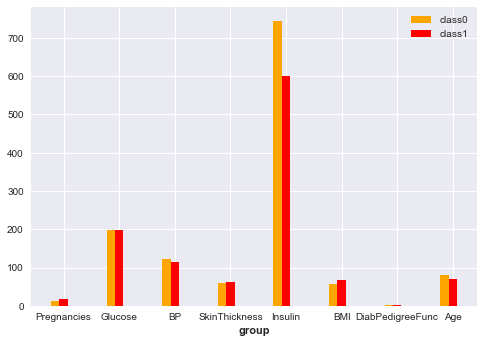

In [21]:
barWidth = 0.15
print(c1_7.max())
bars1 = [c0_1.max(),c0_2.max(),c0_3.max(),c0_4.max(),c0_5.max(),c0_6.max(),c0_7.max(),c0_8.max()]
bars2 = [c1_1.max(),c1_2.max(),c1_3.max(),c1_4.max(),c1_5.max(),c1_6.max(),c1_7.max(),c1_8.max()]
bars1=np.array(bars1)
bars2=np.array(bars2)
r1 = np.arange(len(bars1))
r2 = []
for x in r1:
    r2.append(barWidth+x)
r2=np.array(r2)
plt.bar(r1, bars1, color='orange', width=barWidth, label='class0')
plt.bar(r2, bars2, color='red', width=barWidth, label='class1')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin' , 'BMI' , 'DiabPedigreeFunc' , 'Age'])
plt.legend()
plt.show()